# <center> Homework 5 </center>
## <center> Kishore Narendran | 14644574 | narendrk@uci.edu</center>

### Problem 1 - Basics of Clustering

##### (a) Load the usual Iris data restricted to the first two features, and ignore the class / target variable. Plot the data and see for yourself how clustered you think it looks. 

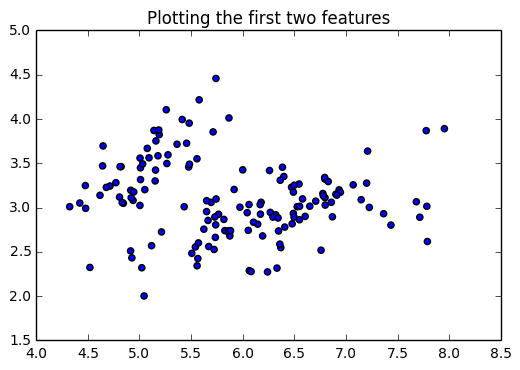

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

iris = np.genfromtxt("data/iris.txt", delimiter = None)
X = iris[:,0:-1]

# (a) Loading the first two features of the iris data set and plotting to check
#   clustering
X_two = X[:,0:2]
plt.scatter(X[:,0], X[:,1], c='b')
plt.title('Plotting the first two features')
plt.show()

##### (b) Run k-means on the data, for `k = 5` and `k = 20`. For each, turn in a plot with the data, colored by assignment, and the cluster centers. (You can easily do this yourself manually, using `ml.plotClassify2D(None,X,z)`, where `z` are the resulting cluster assignments of the data.) Try a few dierent initializations and check to see whether they find the same solution; if not, pick the one with the best score.

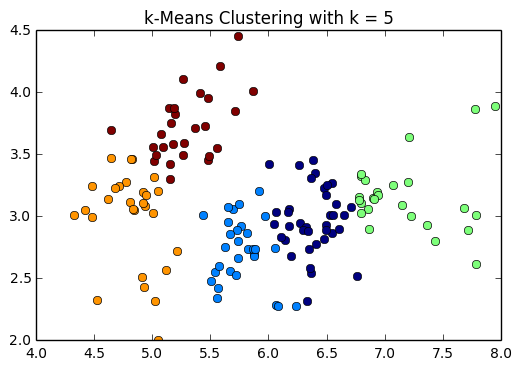

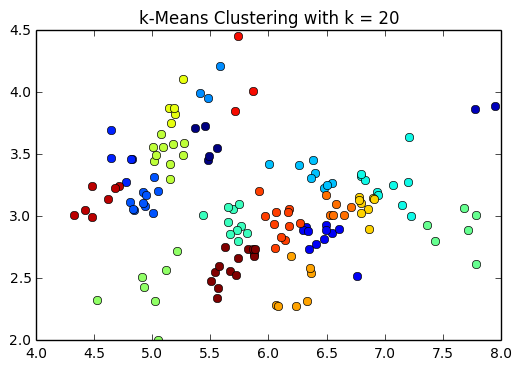

In [19]:
# (b) Running k means with k=5 and k=20 and plotting the same
k_clusters = [5, 20]
for k in k_clusters:
    (z, c, sumd) = ml.cluster.kmeans(X_two, k)
    ml.plotClassify2D(None, X_two, z)
    plt.title('k-Means Clustering with k = ' + str(k))
    plt.show()

The following piece of code varies the initialization and the number of clusters to check for best performance. 

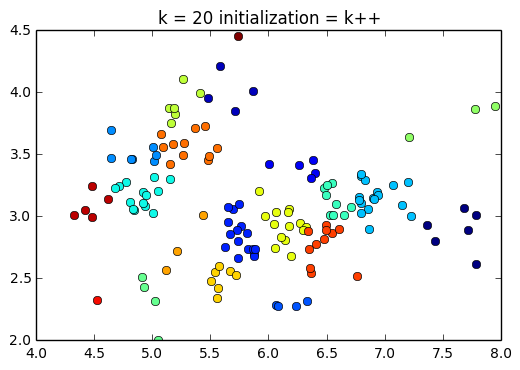

In [20]:
initializations = ['random', 'farthest', 'k++']
parameters = []
for initialization in initializations:
    for k in k_clusters:
        parameters.append((k, initialization))


sumd_s = []
z_s = []
for parameter in parameters:
    (z, c, sumd) = ml.cluster.kmeans(X_two, parameter[0], parameter[1])
    z_s.append(z)
    sumd_s.append(sumd)

index = np.argmin(sumd_s)
ml.plotClassify2D(None, X_two, z_s[index])
plt.title("k = " + str(parameters[index][0]) + " initialization = " + parameters[index][1])
plt.show()

##### (c) Run agglomerative clustering on the data, using single linkage and then again using complete linkage, each with 5 and then 20 clusters. Again, plot with color the final assignment of the clusters, and describe their similarities and differences from each other and k-means. (This algorithm has no initialization issues; so you do not have to try multiple initializations.)

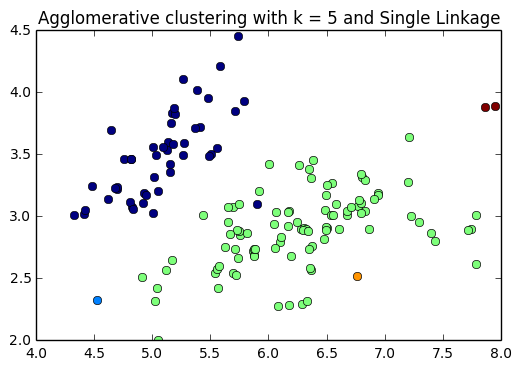

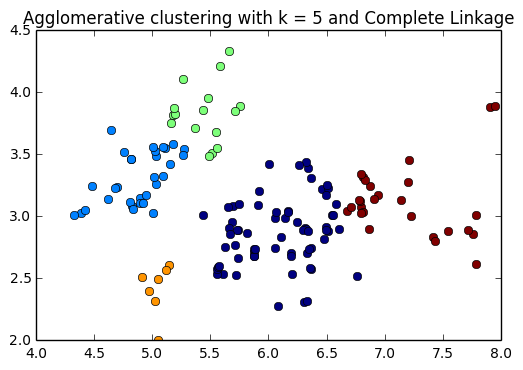

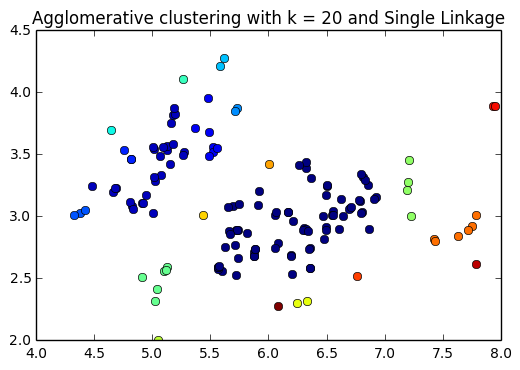

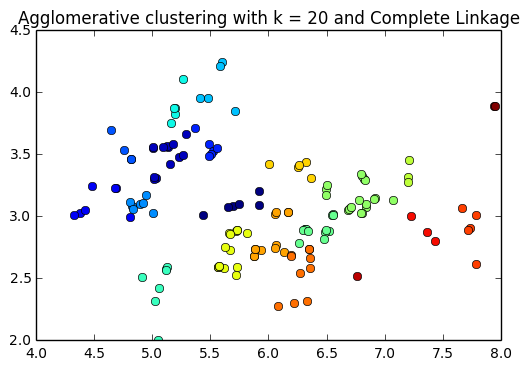

In [21]:
# (c) Running agglomerative clustering on the data with k = 5, and k = 20, with
#   with single linkage and complete linkage
linkage = {'min': 'Single Linkage', 'max': 'Complete Linkage'}
for k in k_clusters:
    for method in ['min', 'max']:
        (z, join) = ml.cluster.agglomerative(X_two, k, method=method)
        ml.plotClassify2D(None, X_two, z)
        plt.title('Agglomerative clustering with k = '+str(k) + ' and ' + linkage[method])
        plt.show()

The performance of Complete Linkage more closely mimics the k-Means clustering algorithm. k-Means and Complete Linkage both produce more rounded clusters, unlike Single Linkage. k-Means produces different clustering results every time it is run, whereas agglomerative clustering produces the same clusters on every run. 

### Problem 2 - Eigen Faces

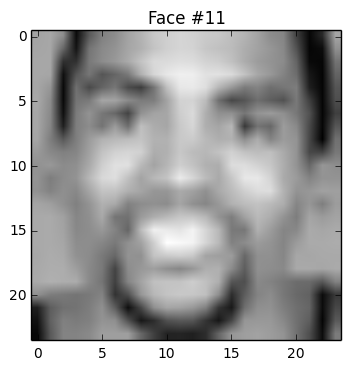

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
from scipy import linalg
import random

X = np.genfromtxt("data/faces.txt", delimiter=None) # load face dataset
plt.figure()
img = np.reshape(X[11,:],(24,24)) # convert vectorized data point to 24x24 image patch
plt.title("Face #11")
plt.imshow( img.T , cmap="gray")
plt.show()

##### (a) Subtract the mean of the face images `X0 = X - mean` to make your data zero-mean. (The mean should be of the same dimension as a face, 576 pixels.)

In [23]:
# (a) Subtracting the mean of the face images from every face
X_mean = np.mean(X, axis=0)
X = X - X_mean # Converting the data to zero mean

##### (b) Use `scipy.linalg.svd` to take the SVD of the data

In [24]:
# (b) Finding the SVD of the image features matrix
U, s, Vh = linalg.svd(X, full_matrices=False)
X0 = U.dot(np.diag(s)).dot(Vh)

##### (c) For `K = [1,10]`, compute the approximation to `X0` given by the first `K` eigendirections, and use them to compute the mean squared error in the SVD's approximation. Plot these MSE values as a function of `K`

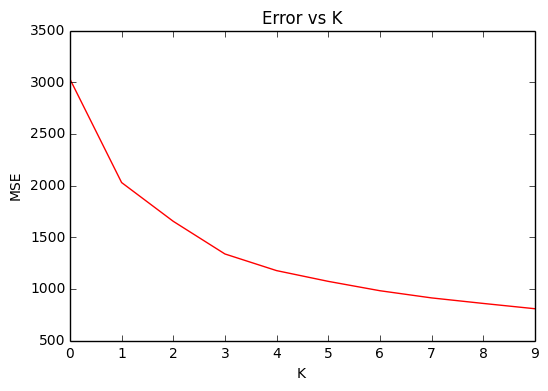

In [25]:
# (c) Finding the approximation of X0 in eigen directions k = [1,10]
eigendirections = range(0,10,1)
error = []
for k in eigendirections:
    Xhat = U[:,0:k].dot(np.diag(s[0:k])).dot(Vh[0:k,:])
    error.append(np.mean((X0-Xhat) ** 2))
plt.plot(eigendirections, error, c='r')
plt.xlabel('K')
plt.ylabel('MSE')
plt.title('Error vs K')
plt.show()

##### (d) Display the first three principal directions of the data

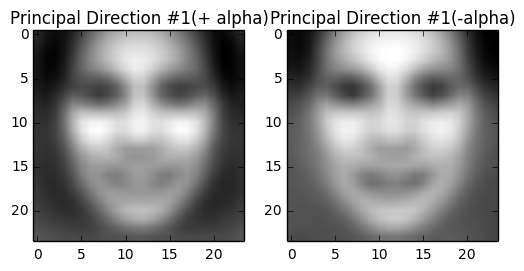

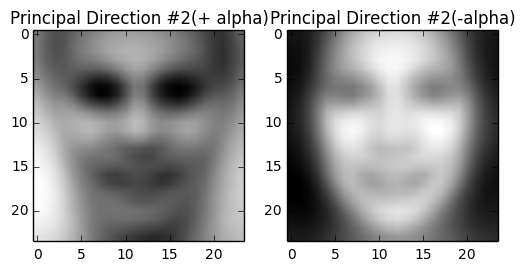

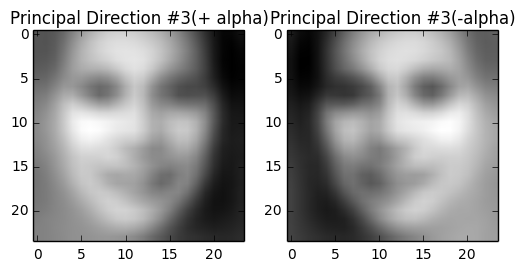

In [26]:
# (d) Displaying the first three principal directions of the data
W = U.dot(np.diag(s)) # Calculating W as U.s for convenience
for j in range(0,3,1):
    alpha = 2*np.median(np.abs(W[:,j]))
    principal_image = X_mean + alpha*Vh[j,:]
    img = np.reshape(principal_image, (24, 24))
    plt.subplot(1,2,1)
    plt.imshow(img.T, cmap='gray')
    plt.title('Principal Direction #' + str(j+1) + '(+ alpha)')

    principal_image = X_mean - alpha*Vh[j,:]
    img = np.reshape(principal_image, (24, 24))
    plt.subplot(1,2,2)
    plt.imshow(img.T, cmap='gray')
    plt.title('Principal Direction #' + str(j+1) + '(-alpha)')
    plt.show()


##### (e) Choose two faces and reconstruct them using only the first K principal directions, for `K=[5,10,50]`.

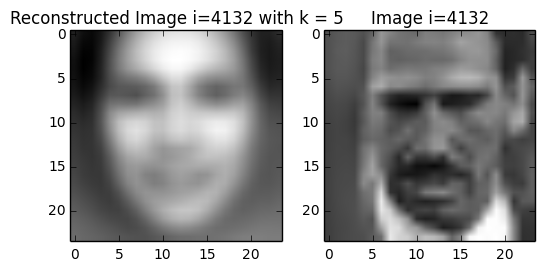

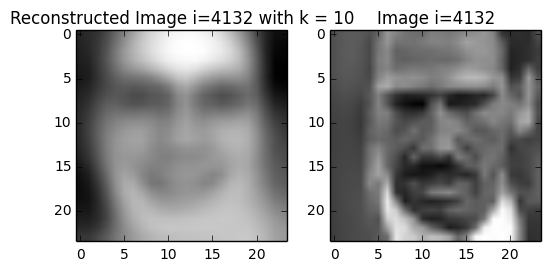

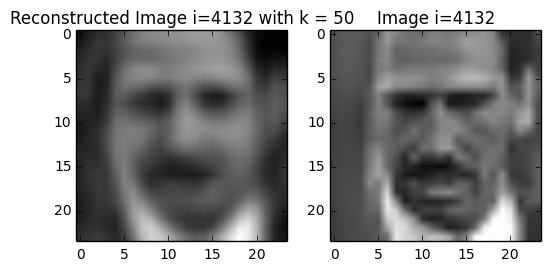

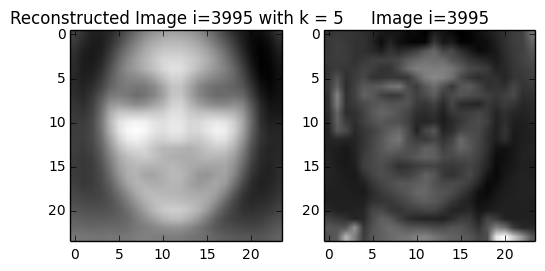

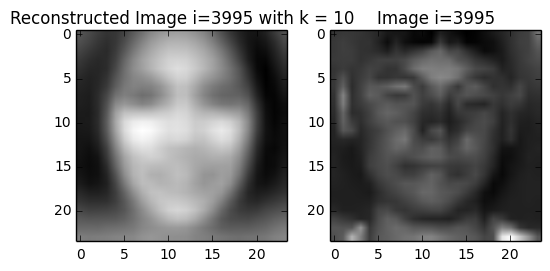

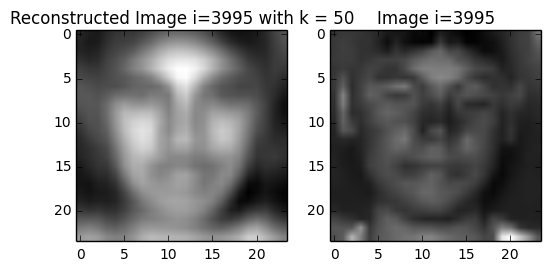

In [27]:
# (e) Finding the first K = [5,10,50] eigen faces and using that to
#   reconstructions
images = [random.randrange(0, X.shape[0], 1) for x in range(0,2,1)]
for i in images:
    for k in [5, 10, 50]:
        img = W[i:i+1,0:k].dot(Vh[0:k,:])
        img = X_mean + img
        img = np.reshape(img, (24,24))
        plt.subplot(1,2,1)
        plt.title('Reconstructed Image i=' + str(i) + ' with k = ' + str(k))
        plt.imshow(img.T, cmap='gray')

        plt.subplot(1,2,2)
        img = np.reshape(X[i,:],(24,24))
        plt.title('Image i=' + str(i))
        plt.imshow(img.T, cmap='gray')
        plt.show()

##### (f) Methods like PCA are often called latent space methods, as the coefficients can be interpreted as a new geometric space in which the data are being described. To visualize this, choose a few faces at random (say, about `15-25`), and display them as images with the coordinates given by their coefficients on the first two principal components

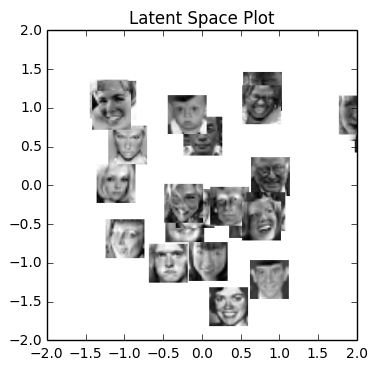

In [28]:
# (f) Latent Space Models
idx = [random.randrange(0, X.shape[0], 1) for x in range(0,25,1)]
coord,params = ml.transforms.rescale( W[:,0:2] ) # normalize scale of "W" locations
for i in idx:
    loc = (coord[i,0],coord[i,0]+0.5, coord[i,1],coord[i,1]+0.5) # where to place the image & size
    img = np.reshape( X[i,:], (24,24) )
    plt.imshow( img.T , cmap="gray", extent=loc ) # draw each image
    plt.title('Latent Space Plot')
    plt.axis((-2,2,-2,2))
plt.show()